---
---

Artificial Intelligence Master's Degree (2022 - 2023)

Natural Language Processing

# **Explainable Human Value Detection**

---
---
## Abstract

This notebook demonstrates multilabel classification for detecting human values in text data. Leveraging the Hugging Face Transformers library, a pretrained transformer model (BERT) is fine-tuned on a dataset containing diverse arguments and associated human values. Key components include data exploration, tokenization, model creation, and fine-tuning. The model's performance is evaluated using the F1-score metric. In the inference section, the model predicts human values in new text data, offering valuable insights into understanding ethical and motivational aspects of written content.


---
---
## Table of Contents

>[Explainable Human Value Detection](#scrollTo=HbeNjlgAIlYh)

>>[Abstract](#scrollTo=Sso0lMlLIuWa)

>>[Table of Contents](#scrollTo=UEplxkDaQGY9)

>>[Background](#scrollTo=yCz0ldhNI6mB)

>>[Implementation](#scrollTo=UwGofHSFI8y5)

>>>[Setup](#scrollTo=P3IBzZViI_kS)

>>>[Imports](#scrollTo=PsSxMqrvI_hK)

>>>[Dataset: Loading](#scrollTo=B10X0u6MJCFY)

>>>[Dataset: Exploration](#scrollTo=-fCuEKtrJEWJ)

>>>>[Random Sample](#scrollTo=kuqo-YHBJfSl)

>>>>[Class Distribution](#scrollTo=EoxgzjYtJg5T)

>>>>[Number of Labels Distribution](#scrollTo=ayxZvTfhJjBy)

>>>>[Sequence Lengths](#scrollTo=Cs5mvrCmTemp)

>>>[Dataset: Tokenization](#scrollTo=cX15WOcjVG6j)

>>>[Model: Creation](#scrollTo=Y5aTQgCWJV3K)

>>>[Model: Fine-Tuning](#scrollTo=wOKz-vxGJYlP)

>>>[Inference](#scrollTo=dwqwlnT_wk3L)



---
---
## Background



#### Human Values Detection

In the context of SemEval 2023 Task 4, known as ValueEval, the objective is to identify human values expressed within textual arguments. This task involves classifying whether a given argument draws upon a specific human value category. Participants in this task are tasked with detecting one or multiple values from a set of 20 distinct value categories.

**Task Overview**

Input: Participants receive textual arguments comprising a premise, a conclusion, and the premise's stance towards the conclusion (either "in favor of" or "against"). Each argument is associated with a unique argument ID.

**Value Categories**

The task involves detecting values categorized into 20 distinct categories. These categories encompass a wide range of human values, including self-direction, power, security, conformity, benevolence, universalism, and more. Each value category represents a dimension on Schwartz's value continuum.

#### Multilabel Classification

Multilabel classification is a task in machine learning where each input instance can be assigned to multiple labels or categories simultaneously. Unlike traditional classification, where one label is assigned per instance, multilabel classification handles scenarios where data can belong to multiple categories concurrently. This is useful in various applications like text classification, image recognition, and recommendation systems, where items can have overlapping attributes. Performance evaluation involves metrics like F1-score, Precision, and Recall.

#### Dataset

The dataset used in this project is designed to detect human values behind textual arguments. It consists of a set of 20 distinct labels representing various human values. Here is a detailed list of the labels along with their descriptions:

1. Self-direction: Thought - Encouraging independent thinking and personal ideas.
2. Self-direction: Action - Promoting autonomy and freedom of action.
3. Stimulation - Advocating for curiosity, exploration, and excitement.
4. Hedonism - Emphasizing pleasure and enjoyment.
5. Achievement - Focusing on success, accomplishment, and ambition.
6. Power: Dominance - Valuing control, influence, and authority.
7. Power: Resources - Emphasizing control over material and financial resources.
8. Face - Concerned with maintaining social status and reputation.
9. Security: Personal - Prioritizing individual safety and well-being.
10. Security: Societal - Emphasizing social stability and safety.
11. Tradition - Valuing cultural and societal traditions.
12. Conformity: Rules - Advocating adherence to established rules and norms.
13. Conformity: Interpersonal - Focusing on fitting in and harmonious relationships.
14. Humility - Promoting modesty and downplaying personal importance.
15. Benevolence: Caring - Emphasizing compassion and concern for others.
16. Benevolence: Dependability - Valuing reliability and trustworthiness.
17. Universalism: Concern - Advocating for concern for all people and the environment.
18. Universalism: Nature - Valuing nature and the environment.
19. Universalism: Tolerance - Emphasizing tolerance, acceptance, and diversity.
20. Universalism: Objectivity - Focusing on fairness, truth, and objectivity.

Here is a table showing examples of arguments with their corresponding labels:

| Argument ID | Conclusion | Stance | Premise | Labels (Sample) |
|---|---|---|---|---|
| A01010 | We should prohibit school prayer | against | It should be allowed if the student... | [Security: Societal, Universalism: Objectivity] |
| A01011 | We should abolish three-strikes laws | in favor | Three-strike laws can cause young... | [Achievement, Power: Resources, Universalism: Concern] |
| A01012 | Use of public defenders should be... | in favor | Public defenders should be mandatory... | [Universalism: Concern] |

In this table, each row represents an argument with its associated ID, conclusion, stance, premise, and a selection of labels that indicate the presence of specific human values within the argument. These labels help classify and identify the values expressed in the arguments, allowing for a deeper understanding of the underlying human values in textual content.

---
---
## Implementation



### Setup

This section installs the most recent versions of:

- 🤗Transformers (and 🤗Accelerate)
- 🤗Datasets

In [1]:
!pip install -q transformers[torch] datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00


### Imports

In [2]:
# Dataset
import numpy as np
import pandas as pd

In [3]:
# Machine Learning
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler

from sklearn import metrics
from sklearn.metrics import classification_report, f1_score

In [4]:
# Hugging Face
from datasets import Dataset, DatasetDict, load_dataset, concatenate_datasets
from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, EvalPrediction

In [5]:
# Matplotlib
import matplotlib.pyplot as plt

# Set Matplotlib theme to dark mode
FONT_COLOUR = "white"
BACKGROUND_COLOUR = "#383838"

plt.rcParams["axes.facecolor"] = BACKGROUND_COLOUR
plt.rcParams["figure.facecolor"] = BACKGROUND_COLOUR

plt.rcParams["text.color"] = FONT_COLOUR
plt.rcParams["xtick.color"] = FONT_COLOUR
plt.rcParams["ytick.color"] = FONT_COLOUR
plt.rcParams["axes.edgecolor"] = FONT_COLOUR
plt.rcParams["axes.labelcolor"] = FONT_COLOUR

In [6]:
# Seaborn
import seaborn as sns

# Set Seaborn theme to dark mode
sns_style = {
    "axes.facecolor": BACKGROUND_COLOUR,
    "figure.facecolor": BACKGROUND_COLOUR,
    "grid.color": "#1D1D1D",
    "axes.edgecolor": "#1D1D1D",

    "text.color": FONT_COLOUR,
    "xtick.color": FONT_COLOUR,
    "ytick.color": FONT_COLOUR,
    "xlabel.color": FONT_COLOUR,
    "ylabel.color": FONT_COLOUR,
    "axes.labelcolor": FONT_COLOUR,
    "patch.edgecolor": FONT_COLOUR
    }

sns.set_style(sns_style)

### Dataset: Loading

In [7]:
# Load the dataset from HF
dataset = load_dataset("webis/Touche23-ValueEval")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [8]:
# Visualize the Dataset Dict and Info
print("-" * 100)
print(dataset)
print()
print("-" * 100)
print(dataset["train"].info.description)
print("-" * 100)

----------------------------------------------------------------------------------------------------
DatasetDict({
    train: Dataset({
        features: ['Argument ID', 'Conclusion', 'Stance', 'Premise', 'Labels'],
        num_rows: 5393
    })
    validation: Dataset({
        features: ['Argument ID', 'Conclusion', 'Stance', 'Premise', 'Labels'],
        num_rows: 1896
    })
    test: Dataset({
        features: ['Argument ID', 'Conclusion', 'Stance', 'Premise', 'Labels'],
        num_rows: 1576
    })
})

----------------------------------------------------------------------------------------------------
Dataset for Touché / SemEval 2023 Task 4; ValueEval: Identification of Human Values behind Arguments:
https://www.overleaf.com/6679855346wrdckzkdccxg
Based on the original Webis-ArgValues-22 (https://doi.org/10.5281/zenodo.5657249) dataset accompanying the paper
Identifying the Human Values behind Arguments (Kiesel et al. 2022b; https://webis.de/publications.html#kiesel_2022b),
pu

### Dataset: Exploration

In [9]:
# Convert the dataset to Pandas DataFrames for easier exploration
df_train = pd.DataFrame(dataset["train"])
df_val = pd.DataFrame(dataset["validation"])
df_test = pd.DataFrame(dataset["test"])

df_train

,Argument ID,Conclusion,Stance,Premise,Labels
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ..."
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ..."
...,...,...,...,...,...
5388,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...","[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
5389,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."
5390,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5391,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, ..."


In [10]:
# Convert labels lists to separate columns for easier exploration
labels = [
    "Self-direction: Thought",
    "Self-direction: Action",
    "Stimulation",
    "Hedonism",
    "Achievement",
    "Power: Dominance",
    "Power: Resources",
    "Face",
    "Security: Personal",
    "Security: Societal",
    "Tradition",
    "Conformity: Rules",
    "Conformity: Interpersonal",
    "Humility",
    "Benevolence: Caring",
    "Benevolence: Dependability",
    "Universalism: Concern",
    "Universalism: Nature",
    "Universalism: Tolerance",
    "Universalism: Objectivity",
]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}

# Create a new dataframe with separate label columns
df_train = pd.concat([df_train, pd.DataFrame(df_train["Labels"].tolist(), columns=labels)], axis=1)
df_val = pd.concat([df_val, pd.DataFrame(df_val["Labels"].tolist(), columns=labels)], axis=1)
df_test = pd.concat([df_test, pd.DataFrame(df_test["Labels"].tolist(), columns=labels)], axis=1)

# Drop the "Labels" column from the new dataframe
df_train.drop(columns=["Labels"], inplace=True)
df_val.drop(columns=["Labels"], inplace=True)
df_test.drop(columns=["Labels"], inplace=True)

df_train.head()

,Argument ID,Conclusion,Stance,Premise,Self-direction: Thought,Self-direction: Action,Stimulation,Hedonism,Achievement,Power: Dominance,...,Tradition,Conformity: Rules,Conformity: Interpersonal,Humility,Benevolence: Caring,Benevolence: Dependability,Universalism: Concern,Universalism: Nature,Universalism: Tolerance,Universalism: Objectivity
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


#### Random Sample

In [11]:
# Visualize a Random Sample
df_train.iloc[0]

Argument ID                                                              A01002
Conclusion                                          We should ban human cloning
Stance                                                              in favor of
Premise                       we should ban human cloning as it will only ca...
Self-direction: Thought                                                       0
Self-direction: Action                                                        0
Stimulation                                                                   0
Hedonism                                                                      0
Achievement                                                                   0
Power: Dominance                                                              0
Power: Resources                                                              0
Face                                                                          0
Security: Personal                      

#### Class Distribution

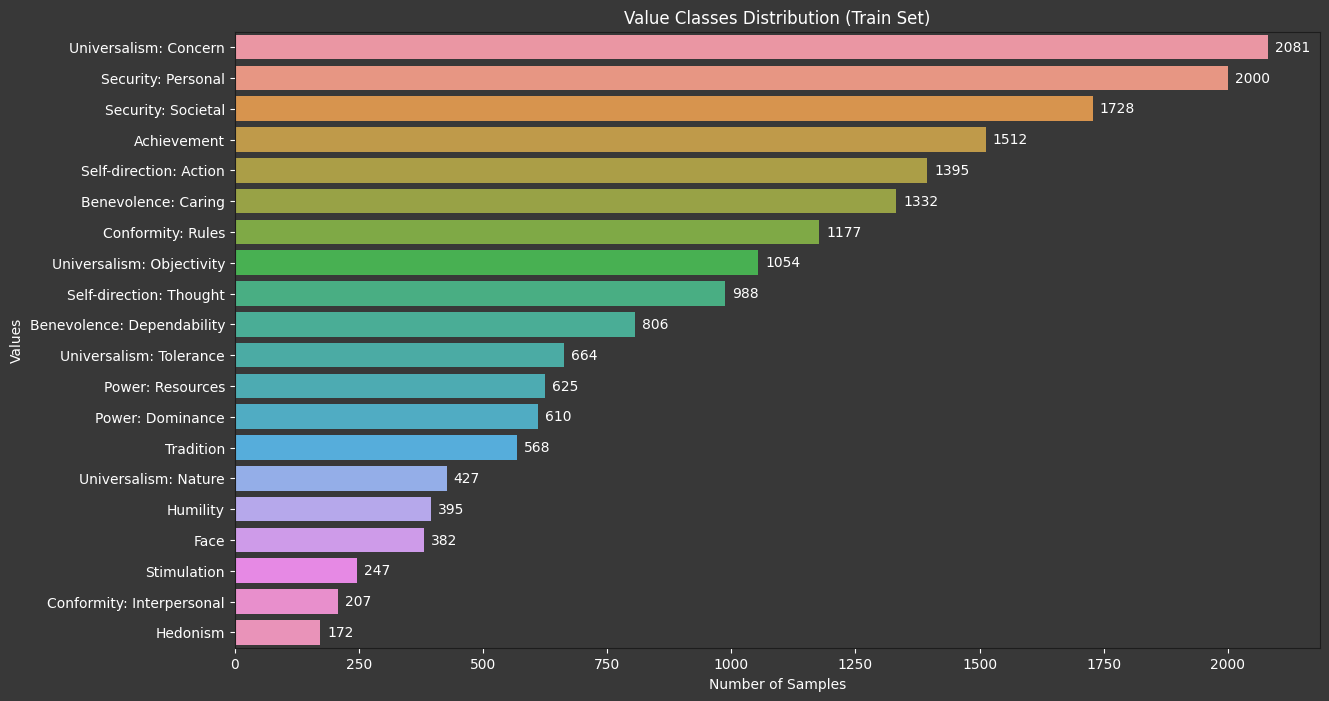

In [12]:
# Set the figure size for the plot
plt.figure(figsize=(14, 8))

# Sort the data in descending order
sorted_data = df_train[df_train.columns[4:]].sum().sort_values(ascending=False)

# Create a barplot using Seaborn with the sorted data
ax = sns.barplot(
    x=sorted_data.values,
    y=sorted_data.index
)

# Add labels to the bars of the barplot with some padding
ax.bar_label(ax.containers[0], padding=5)

# Set the title of the plot
plt.title("Value Classes Distribution (Train Set)")

# Label the x-axis
plt.xlabel("Number of Samples")

# Label the y-axis
plt.ylabel("Values")

# Display the plot
plt.show()

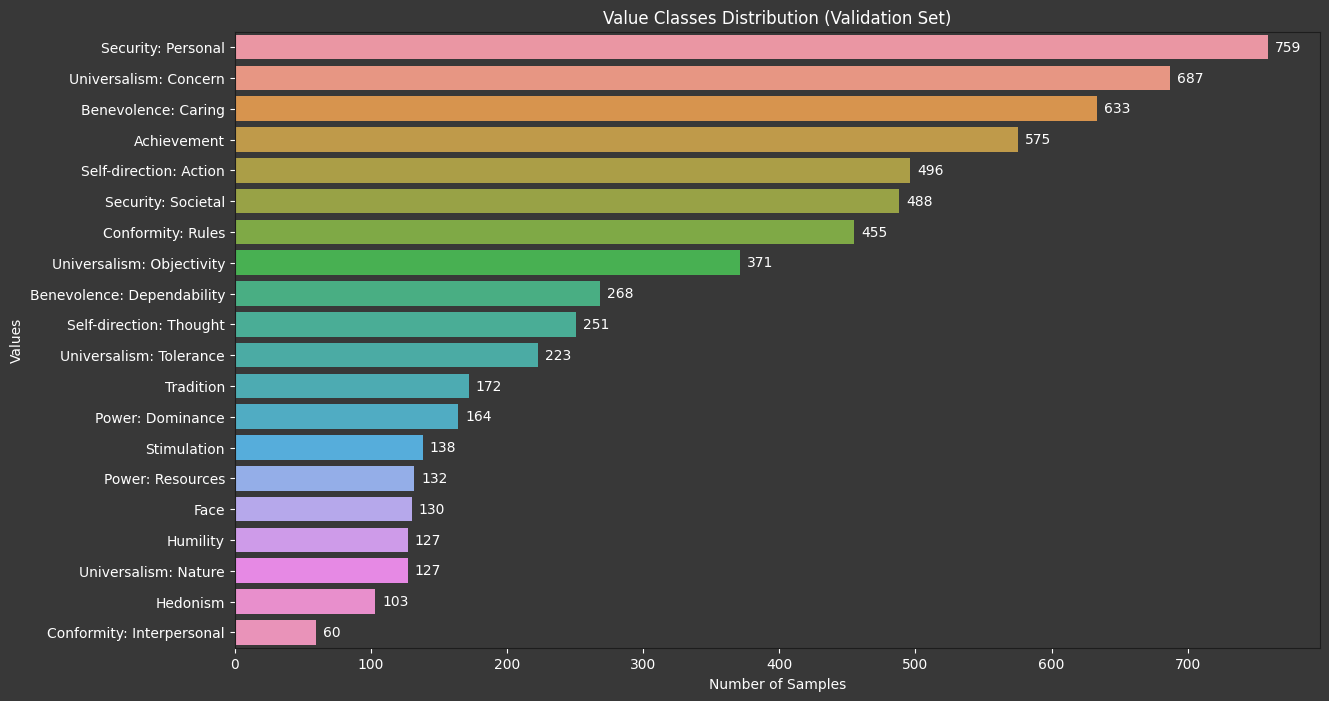

In [13]:
# Set the figure size for the plot
plt.figure(figsize=(14, 8))

# Sort the data in descending order
sorted_data = df_val[df_val.columns[4:]].sum().sort_values(ascending=False)

# Create a barplot using Seaborn with the sorted data
ax = sns.barplot(
    x=sorted_data.values,
    y=sorted_data.index
)

# Add labels to the bars of the barplot with some padding
ax.bar_label(ax.containers[0], padding=5)

# Set the title of the plot
plt.title("Value Classes Distribution (Validation Set)")

# Label the x-axis
plt.xlabel("Number of Samples")

# Label the y-axis
plt.ylabel("Values")

# Display the plot
plt.show()

#### Number of Labels Distribution

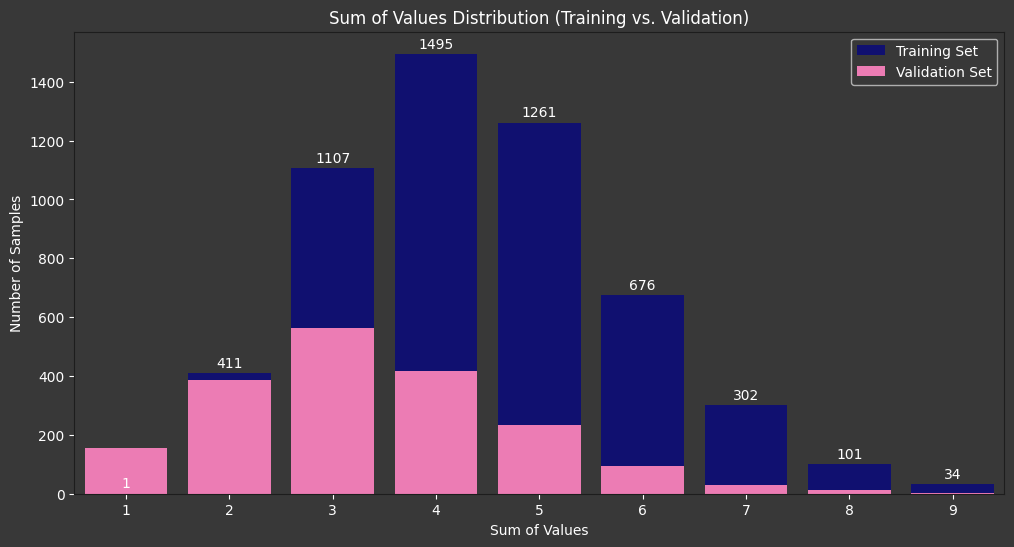

In [14]:
# Calculate the sum of values for each row, excluding the first 4 columns
sum_values_train = df_train.iloc[:, 4:].sum(axis=1)
sum_values_valid = df_val.iloc[:, 4:].sum(axis=1)

# Create the figure and subplots
plt.figure(figsize=(12, 6))
ax_train = sns.barplot(x=sum_values_train.value_counts().index, y=sum_values_train.value_counts().values, color="navy", label="Training Set")
ax_valid = sns.barplot(x=sum_values_valid.value_counts().index, y=sum_values_valid.value_counts().values, color="hotpink", label="Validation Set")

# Add labels to the bars
ax_train.bar_label(ax_train.containers[0], padding=2)

# Set plot title and axis labels
plt.title("Sum of Values Distribution (Training vs. Validation)")
plt.ylabel("Number of Samples")
plt.xlabel("Sum of Values")

# Add a legend
plt.legend()

# Display the plot
plt.show()

#### Sequence Lengths

It's important to visualize the sequence lengths of the premises in order to define a suitable `max_seq_len` parameter for the padding of samples during the tokenization.

In [15]:
# Load the tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

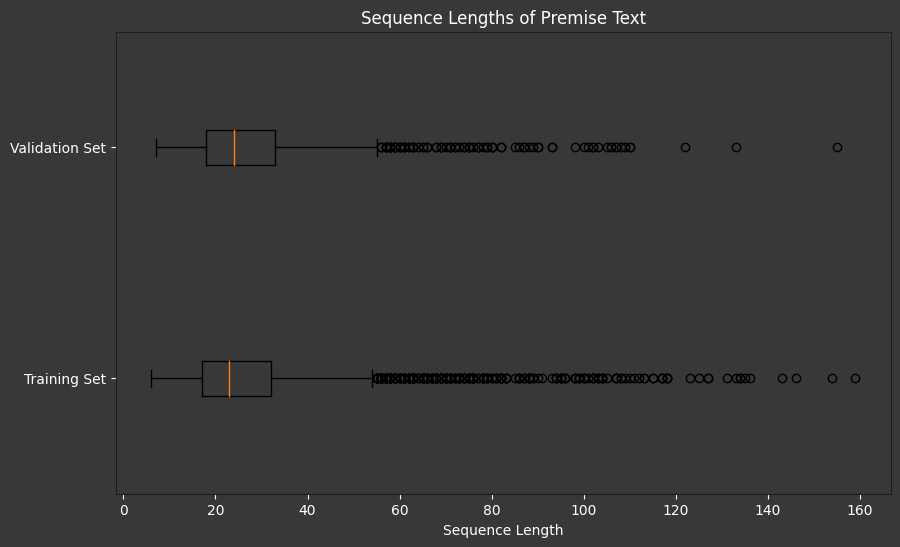

In [16]:
# Tokenize the text in the "Premise"
tokenized_train_premises = df_train["Premise"].apply(lambda x: tokenizer(x, truncation=True))
tokenized_val_premises = df_val["Premise"].apply(lambda x: tokenizer(x, truncation=True))

# Compute the sequence lengths
train_premises_lengths = [len(x["input_ids"]) for x in tokenized_train_premises]
val_premises_lengths = [len(x["input_ids"]) for x in tokenized_val_premises]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([train_premises_lengths, val_premises_lengths], vert=False)

# Labels for the boxplots
boxplot_labels = ["Training Set", "Validation Set"]

# Set y-axis labels
plt.yticks([1, 2], boxplot_labels)

# Set plot title and axis labels
plt.title("Sequence Lengths of Premise Text")
plt.xlabel("Sequence Length")

# Show the plot
plt.show()

In [17]:
train_hits_32 = sum(1 for x in train_premises_lengths if x > 32) / len(train_premises_lengths) * 100
train_hits_64 = sum(1 for x in train_premises_lengths if x > 64) / len(train_premises_lengths) * 100
train_hits_128 = sum(1 for x in train_premises_lengths if x > 128) / len(train_premises_lengths) * 100

val_hits_32 = sum(1 for x in val_premises_lengths if x > 32) / len(val_premises_lengths) * 100
val_hits_64 = sum(1 for x in val_premises_lengths if x > 64) / len(val_premises_lengths) * 100
val_hits_128 = sum(1 for x in val_premises_lengths if x > 128) / len(val_premises_lengths) * 100

print("Training Set:")
print(f"\tTruncated Samples with max_seq_len = 32: {round(train_hits_32, 2)}%")
print(f"\tTruncated Samples with max_seq_len = 64: {round(train_hits_64, 2)}%")
print(f"\tTruncated Samples with max_seq_len = 128: {round(train_hits_128, 2)}%")

print("\nValidation Set:")
print(f"\tTruncated Samples with max_seq_len = 32: {round(val_hits_32, 2)}%")
print(f"\tTruncated Samples with max_seq_len = 64: {round(val_hits_64, 2)}%")
print(f"\tTruncated Samples with max_seq_len = 128: {round(val_hits_128, 2)}%")

max_seq_len = 64

Training Set:
	Truncated Samples with max_seq_len = 32: 23.25%
	Truncated Samples with max_seq_len = 64: 3.52%
	Truncated Samples with max_seq_len = 128: 0.19%

Validation Set:
	Truncated Samples with max_seq_len = 32: 26.11%
	Truncated Samples with max_seq_len = 64: 3.27%
	Truncated Samples with max_seq_len = 128: 0.11%


### Dataset: Tokenization

In [18]:
# Create a DatasetDict object
ds = DatasetDict({
    "train": Dataset.from_pandas(df_train),
    "val": Dataset.from_pandas(df_val),
    "test": Dataset.from_pandas(df_test)
})

ds

DatasetDict({
    train: Dataset({
        features: ['Argument ID', 'Conclusion', 'Stance', 'Premise', 'Self-direction: Thought', 'Self-direction: Action', 'Stimulation', 'Hedonism', 'Achievement', 'Power: Dominance', 'Power: Resources', 'Face', 'Security: Personal', 'Security: Societal', 'Tradition', 'Conformity: Rules', 'Conformity: Interpersonal', 'Humility', 'Benevolence: Caring', 'Benevolence: Dependability', 'Universalism: Concern', 'Universalism: Nature', 'Universalism: Tolerance', 'Universalism: Objectivity'],
        num_rows: 5393
    })
    val: Dataset({
        features: ['Argument ID', 'Conclusion', 'Stance', 'Premise', 'Self-direction: Thought', 'Self-direction: Action', 'Stimulation', 'Hedonism', 'Achievement', 'Power: Dominance', 'Power: Resources', 'Face', 'Security: Personal', 'Security: Societal', 'Tradition', 'Conformity: Rules', 'Conformity: Interpersonal', 'Humility', 'Benevolence: Caring', 'Benevolence: Dependability', 'Universalism: Concern', 'Universalism: Na

In [19]:
def preprocess_data(examples):

  # take a batch of texts
  text = examples["Premise"]

  # encode them
  encoding = tokenizer(text, padding="max_length", max_length=max_seq_len, truncation=True)

  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}

  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))

  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()

  return encoding

In [20]:
tokenized_dataset = ds.map(preprocess_data, batched=True, remove_columns=ds["train"].column_names)

Map:   0%|          | 0/5393 [00:00<?, ? examples/s]

Map:   0%|          | 0/1896 [00:00<?, ? examples/s]

Map:   0%|          | 0/1576 [00:00<?, ? examples/s]

In [21]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 5393
    })
    val: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1896
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1576
    })
})

In [22]:
# Decoded Example
example = tokenized_dataset["train"][0]
tokenizer.decode(example["input_ids"])

'[CLS] we should ban human cloning as it will only cause huge issues when you have a bunch of the same humans running around all acting the same. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [23]:
example["labels"]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [24]:
[id2label[idx] for idx, label in enumerate(example["labels"]) if label == 1.0]

['Security: Societal']

In [25]:
tokenized_dataset.set_format("torch")

### Model: Creation

In [26]:
config = AutoConfig.from_pretrained(
    model_name,
    problem_type="multi_label_classification",
    num_labels=len(labels),
    output_hidden_states=True,
    output_attention=True,
    id2label=id2label,
    label2id=label2id
    )


model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    config=config
    )

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
# Evaluation Function For Fine-Tuning
def multi_label_metrics(predictions, labels, threshold=0.5):

    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))

    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1

    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average="micro")

    # return as dictionary
    metrics = {"f1": f1_micro_average}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    result = multi_label_metrics(predictions=preds, labels=p.label_ids)
    return result

### Model: Fine-Tuning

In [28]:
batch_size = 16
num_epochs = 5
metric_name = "f1"

args = TrainingArguments(
    f"bert-finetuned",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
)

In [29]:
trainer = Trainer(
    model,
    args,
    train_dataset=concatenate_datasets([tokenized_dataset["train"], tokenized_dataset["val"]]),
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1
1,No log,0.333870,0.367611
2,0.401800,0.313363,0.474318
3,0.327800,0.302979,0.490063
4,0.295300,0.300046,0.501919
5,0.273900,0.298318,0.504970


TrainOutput(global_step=2280, training_loss=0.3171889689930698, metrics={'train_runtime': 575.3159, 'train_samples_per_second': 63.348, 'train_steps_per_second': 3.963, 'total_flos': 1198829018703360.0, 'train_loss': 0.3171889689930698, 'epoch': 5.0})

### Inference

In [30]:
n = 100
example_text = dataset["test"][n]["Premise"]
example_labels = dataset["test"][n]["Labels"]

print(f"Premise: {example_text}")
print(f"Labels: {[id2label[idx] for idx, label in enumerate(example_labels) if label == 1.0]}")

Premise: dads who choose to stay home are taking away resources from the potential workforce. this could hurt a nation's economy and make the future less promising for younger generations.
Labels: ['Power: Resources', 'Security: Personal', 'Security: Societal', 'Benevolence: Caring', 'Universalism: Concern']


In [35]:
encoding = tokenizer(example_text, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k, v in encoding.items()}

outputs = trainer.model(**encoding)
logits = outputs.logits

# apply sigmoid + threshold
threshold = 0.2
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(logits.squeeze().cpu())
predictions = np.zeros(probs.shape)
predictions[np.where(probs >= threshold)] = 1

# turn predicted id's into actual label names
predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]
print(predicted_labels)

['Achievement', 'Power: Resources', 'Security: Personal', 'Security: Societal', 'Benevolence: Caring', 'Universalism: Concern']


### Evaluation

In [36]:
# Evaluate the model on the test set
results = trainer.predict(tokenized_dataset["test"])

# Get the predicted logits
predicted_logits = results.predictions

In [62]:
# Apply sigmoid activation and threshold to get binary predictions
sigmoid = torch.nn.Sigmoid()

threshold = 0.2
predicted_probs = sigmoid(torch.Tensor(predicted_logits[0]))
y_pred = np.zeros(predicted_probs.shape)
y_pred[np.where(predicted_probs >= threshold)] = 1

# Print classification report
y_true = np.array(tokenized_dataset["test"]["labels"])
target_names = [id2label[idx] for idx in range(len(labels))]
classification_rep = classification_report(y_true, y_pred, target_names=target_names)

print(classification_rep)

                            precision    recall  f1-score   support

   Self-direction: Thought       0.31      0.68      0.43       143
    Self-direction: Action       0.47      0.79      0.59       391
               Stimulation       0.32      0.13      0.19        77
                  Hedonism       0.21      0.31      0.25        26
               Achievement       0.51      0.75      0.61       412
          Power: Dominance       0.33      0.34      0.33       108
          Power: Resources       0.40      0.67      0.50       105
                      Face       0.19      0.06      0.09        96
        Security: Personal       0.57      0.90      0.70       537
        Security: Societal       0.43      0.81      0.57       397
                 Tradition       0.43      0.67      0.52       168
         Conformity: Rules       0.35      0.78      0.48       287
 Conformity: Interpersonal       0.57      0.32      0.41        53
                  Humility       0.09      0.07

The provided classification results represent the performance of the multi-label classifier on the test dataset.

**Class-Specific Performance:**

For each value, we have metrics such as precision, recall, and F1-score. These metrics indicate how well the classifier performs for each specific class.
- Precision measures the accuracy of the classifier in predicting positive instances for a particular class.
- Recall measures how well the classifier can find all the positive instances for a class.
- F1-score is the harmonic mean of precision and recall, providing a balance between precision and recall for each class.

**Variability Across Classes:**

The performance of the classifier varies across different values. Some, like `"Security: Personal"` and `"Universalism: Concern,"` have relatively high precision, recall, and F1-scores, suggesting that the classifier is good at predicting these traits.
Other traits, like `"Humility,"` have lower precision, recall, and F1-scores, indicating that the classifier struggles to predict this trait accurately.

**Overall Performance:**

- The micro-average F1-score (0.54) represents the overall performance of the classifier across all classes, giving equal weight to each sample.
- The macro-average F1-score (0.44) provides an average F1-score across all classes, treating each class equally regardless of sample size.
- The weighted average F1-score (0.53) takes into account the class distribution, giving more weight to classes with more samples.

**Class Imbalance:**

Class imbalance can be observed in the support values. Some classes have a higher number of samples (e.g., `"Universalism: Concern"` with 588 samples), while others have fewer samples (e.g., `"Hedonism"` with 26 samples). This can impact the model's performance, especially for minority classes.